In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model

from IPython.display import SVG,Image
import tensorflow as tf
print("Tensorflow version",tf.__version__)


Tensorflow version 2.15.0


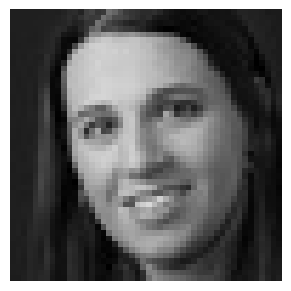

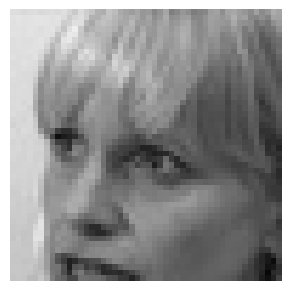

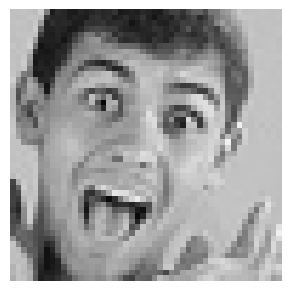

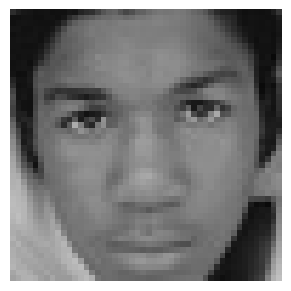

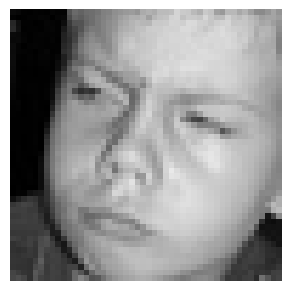

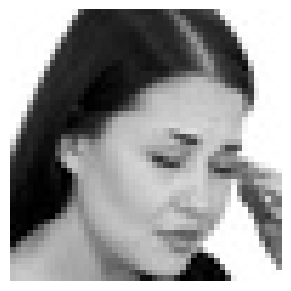

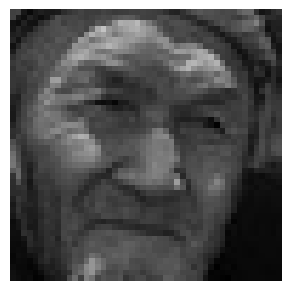

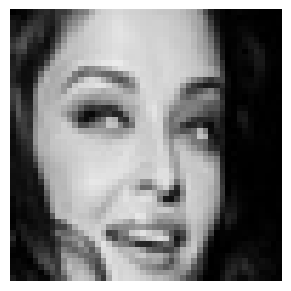

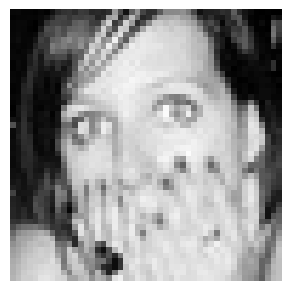

In [2]:
import glob
import random
import matplotlib.pyplot as plt
import cv2


images = glob.glob(r"E:\Emotion detection\train/*/*")

if images:
    for i in range(9):
        image = random.choice(images)
        plt.figure(figsize=(12, 12))
        plt.subplot(331 + i)
        plt.imshow(cv2.imread(image))
        plt.axis('off')
else:
    print("No images found.")

In [3]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Absolute path to the "train" directory using os.path.join
#train_dir = os.path.join("C:", "Users", "Lenovo", "Desktop", "Emotion detection", "train\\")

# Alternatively, you can use a raw string for the path
# train_dir = r"C:\Users\Lenovo\Desktop\Emotion detection\train"

# Make sure the path ends with a double backslash
train_dir = "E:\\Emotion detection\\train\\"

# Absolute path to the "test" directory using direct specification
test_dir = r"E:\\Emotion detection\\test\\"

img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory(train_dir,
                                                    target_size=(img_size, img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                    shuffle=True)

datagen_validation = ImageDataGenerator()
train_validation = datagen_train.flow_from_directory(test_dir,
                                                      target_size=(img_size, img_size),
                                                      color_mode="grayscale",
                                                      batch_size=batch_size,
                                                      class_mode="categorical",
                                                      shuffle=True)

Found 8175 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Dropout, Dense, Flatten
from tensorflow.keras.models import Model

def Convolution (input_tensor,filters, kernel_size):
    x= Conv2D(filters= filters, kernel_size = kernel_size, padding= "same")(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.25)(x)

    return x;

In [5]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization(axis=1)(x)  # Specify the axis to normalize over
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    return x

In [6]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32, (3, 3))
    conv_2 = Convolution(conv_1, 64, (5, 5))
    conv_3 = Convolution(conv_2, 128, (3, 3))
    
    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten, 256)
    
    output = Dense(7, activation="softmax")(dense_1)
    model = Model(inputs=[inputs], outputs=[output])  # Fix the argument name here
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model


In [7]:
model = model_fer((48, 48, 1))
model.summary()





Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        51264     
                                                          

In [8]:
epochs=15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = train_validation.n//train_validation.batch_size

checkpoint=ModelCheckpoint("model_weights.h5",monitor='val_accuracy',save_weight_only=True, mode='max',verbose =1 )
callbacks=[checkpoint]

In [11]:
history=model.fit(
x=train_generator,
steps_per_epoch= steps_per_epoch,
epochs=epochs,
validation_data=train_validation,
validation_steps= validation_steps,
callbacks=callbacks
    
)

Epoch 1/15
127/127 [==============================] - ETA: 0s - loss: 1.8649 - accuracy: 0.2870
Epoch 1: saving model to model_weights.h5


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


127/127 [==============================] - 649s 5s/step - loss: 1.8649 - accuracy: 0.2870 - val_loss: 1.8855 - val_accuracy: 0.3463
Epoch 2/15
127/127 [==============================] - ETA: 0s - loss: 1.5478 - accuracy: 0.4122
Epoch 2: saving model to model_weights.h5
127/127 [==============================] - 772s 6s/step - loss: 1.5478 - accuracy: 0.4122 - val_loss: 2.3904 - val_accuracy: 0.1426
Epoch 3/15
127/127 [==============================] - ETA: 0s - loss: 1.2963 - accuracy: 0.5061
Epoch 3: saving model to model_weights.h5
127/127 [==============================] - 917s 7s/step - loss: 1.2963 - accuracy: 0.5061 - val_loss: 1.3439 - val_accuracy: 0.4944
Epoch 4/15
127/127 [==============================] - ETA: 0s - loss: 0.9630 - accuracy: 0.6439
Epoch 4: saving model to model_weights.h5
127/127 [==============================] - 1129s 9s/step - loss: 0.9630 - accuracy: 0.6439 - val_loss: 1.1971 - val_accuracy: 0.5385
Epoch 5/15
127/127 [==============================] - ETA

In [9]:
model.evaluate(train_validation)



113/113 [==============================] - 107s 927ms/step - loss: 12.8078 - accuracy: 0.1447


[12.807790756225586, 0.14474783837795258]

AttributeError: module 'matplotlib.pyplot' has no attribute 'subplot_adjust'

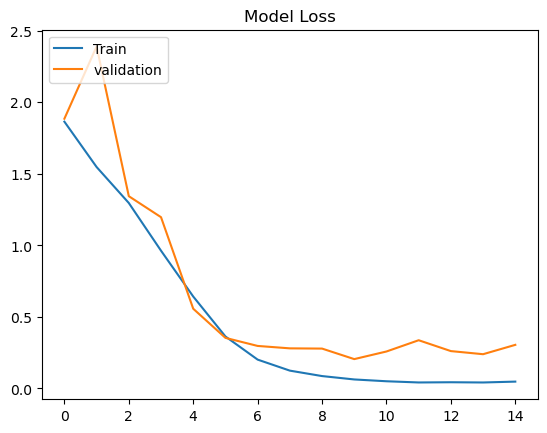

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','validation'],loc='upper left')
plt.subplot_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

AttributeError: module 'matplotlib.pyplot' has no attribute 'subplot_adjust'

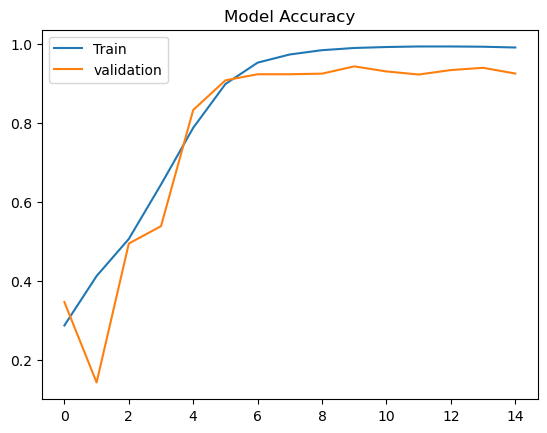

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','validation'],loc='upper left')
plt.subplot_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

In [15]:
model_json=model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)

In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Define and preprocess your data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0

# Define your model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile your model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train your model
model.fit(x_train, y_train, epochs=5)

# Save your model
# Save the trained model with the native Keras format
model.save("my_model.keras")


# Load your model
loaded_model = tf.keras.models.load_model("my_model.keras")



Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3020 - accuracy: 0.9147
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1416 - accuracy: 0.9589
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1041 - accuracy: 0.9692
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0845 - accuracy: 0.9749
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0690 - accuracy: 0.9788


In [17]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model("E:\\Emotion detection\\my_model.keras")

# Function to preprocess the uploaded image and resize it to match the model's input shape
def preprocess_image(image_path):
    img = Image.open(image_path).resize((28, 28)).convert('L')
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to make emotion prediction using the loaded model
def predict_emotion(image_path):
    preprocessed_img = preprocess_image(image_path)
    prediction = model.predict(preprocessed_img)
    emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    predicted_emotion = emotion_labels[np.argmax(prediction)]
    return predicted_emotion

# Function to handle image upload
def upload_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        img = Image.open(file_path)
        img.thumbnail((300, 300))
        img = ImageTk.PhotoImage(img)
        image_label.config(image=img)
        image_label.image = img
        
        # Perform emotion recognition
        predicted_emotion = predict_emotion(file_path)
        
        # Update the result label with predicted emotion
        result_label.config(text=f'Predicted Emotion: {predicted_emotion}')

# GUI Setup
root = tk.Tk()
root.title("Emotion Recognition")
root.geometry("500x500")

# Button to upload image
upload_button = tk.Button(root, text="Upload Image", command=upload_image)
upload_button.pack(pady=10)

# Label to display uploaded image
image_label = tk.Label(root)
image_label.pack(pady=5)

# Label to display predicted emotion
result_label = tk.Label(root, text="")
result_label.pack(pady=5)

root.mainloop()


1/1 [==============================] - 0s 46ms/step


In [ ]:
import cv2
import numpy as np
import tensorflow as tf


model = tf.keras.models.load_model("E:\\Emotion detection\\my_model.keras")


emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Function to preprocess the frame for emotion prediction
def preprocess_frame(frame):
    # Resize frame to match input size of the model
    resized_frame = cv2.resize(frame, (28, 28))
    # Convert frame to grayscale
    grayscale_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)
    # Normalize pixel values
    normalized_frame = grayscale_frame / 255.0
    # Expand dimensions to match model input shape
    preprocessed_frame = np.expand_dims(normalized_frame, axis=0)
    return preprocessed_frame


# Open video capture device (webcam)
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Preprocess frame for emotion prediction
    preprocessed_frame = preprocess_frame(frame)
    
    # Make emotion prediction using your model
    prediction = model.predict(preprocessed_frame)
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotion_labels[predicted_emotion_index]
    
    # Display predicted emotion on the frame
    cv2.putText(frame, f'Emotion: {predicted_emotion}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Display the frame
    cv2.imshow('Emotion Detection', frame)
    
    # Check for key press to exit the loop
    key = cv2.waitKey(1)
    if key == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 387ms/step


1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 322ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 195ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 133ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 49ms/step


In [ ]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


history = model.fit(
   x=train_generator,
   
   
    validation_data=train_validation,
   
   
)

# Define your model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, 3, activation='relu', input_shape=(timesteps, num_features)),  # Adjust input shape here
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])



model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=15, validation_data=(x_val, y_val))

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

 



In [19]:
import cv2
import numpy as np
import tensorflow as tf

facial_model = tf.keras.models.load_model("my_model.h5")


audio_model = tf.keras.models.load_model("audio_emotion_model.h5")

# Function to preprocess frame for facial emotion detection
def preprocess_frame(frame):
    # Preprocess frame as needed (resize, convert to grayscale, etc.)
    # Return preprocessed frame
    pass

# Function to preprocess audio for emotion analysis
def preprocess_audio(audio):
    # Preprocess audio as needed (extract features, normalize, etc.)
    # Return preprocessed audio
    pass

# Open video capture device (webcam)
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # Capture audio
    audio = capture_audio()
    
    # Preprocess frame for facial emotion detection
    preprocessed_frame = preprocess_frame(frame)
    # Preprocess audio for emotion analysis
    preprocessed_audio = preprocess_audio(audio)
    
    # Make facial emotion prediction using your model
    facial_prediction = facial_model.predict(preprocessed_frame)
    facial_emotion = np.argmax(facial_prediction)
    
    # Make audio emotion prediction using your model
    audio_prediction = audio_model.predict(preprocessed_audio)
    audio_emotion = np.argmax(audio_prediction)
    
    # Combine predictions (e.g., majority voting, weighted average, etc.)
    # Final combined emotion prediction
    
    # Display the combined emotion prediction
    print("Combined Emotion Prediction:", combined_emotion)
    
    # Display the frame
    cv2.imshow('Emotion Detection', frame)
    
    # Exit loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture device and close OpenCV windows
cap.release()
cv2.destroyAllWindows()


OSError: No file or directory found at audio_emotion_model.h5